# 회귀(regression) - 예측

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

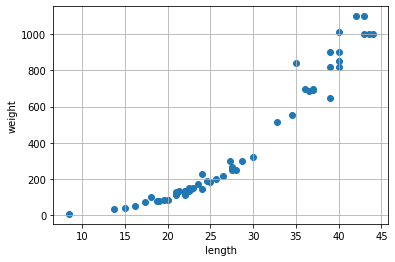

In [4]:
plt.scatter(perch_length, perch_weight)
plt.grid()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# KNeighborRegressor(최근접 이웃 회귀) 준비

KNeighborRegressor는 2차원을 기준으로 한다.

다만, 타깃을 정해주지 않고 특성 중 하나로 선택한다.

In [5]:
from sklearn.model_selection import train_test_split                               # KNeighborsRegressor은 KNeighborsClassifier과 달리 길이와 무게 데이터를 (2, 2) 행렬의 모습으로 변환하지 않고
train_input, test_input, train_target, test_target = train_test_split(             # 1차원인 상태로 대입한다. 즉, input에는 길이의 1차원 형태가 들어가고 target에는 무게의 1차원 형태가 들어간다.
    perch_length, perch_weight, random_state=42
)                                                                                  # train_test_split으로 인해 랜덤이 진행된 상태로 출력시 아래와 같이 나온다.

In [6]:
print(train_target)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [7]:
print(train_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [8]:
train_input.shape

(42,)

In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [10]:
test_array = test_array.reshape(2, 2)
print(test_array)

[[1 2]
 [3 4]]


In [11]:
train_input = train_input.reshape(-1, 1)                                           # -1은 '끝까지' 혹은 '모든 것' 이라는 뜻.
test_input = test_input.reshape(-1, 1)                                             # 1차원 형태의 길이 데이터를 2차원의 형태로 바꿔준 것이다.
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# KNeighborRegressor(최근접 이웃 회귀)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr = KNeighborsRegressor()                                                        # KNeighborsClassifier에서도 input은 (2, 2) 행렬의 형태, target은 1차원의 형태로 들어갔다.
                                                                                   # 이것은 KNeighborsRegressor에서도 마찬가지이다. input은 길이의 2차원 형태, target은 무게의 1차원 형태일 뿐
knr.fit(train_input, train_target)                                                 # 객체화는 필수이다.

KNeighborsRegressor()

# 결정계수(coefficient of determination) = R^2

결정계수는 **회귀 문제의 성능을 측정하는 도구이다.**

## R^2 = 1 - ((타깃 - 예측)^2) / ((타깃 - 평균)^2)

In [14]:
print(knr.score(train_input, train_target))                                        # 분류(KNeighborsClassifier)에서는 score의 값을 정확도라고 불렀다.
                                                                                   # 하지만 회귀(KNeighborsRegressor)에서는 주어진 값의 정답이 없으므로 정확도가 아닌 결정계수라고 불린다.

0.9698823289099254


In [15]:
print(knr.score(test_input, test_target))

0.992809406101064


결정계수의 값은 높을수록(1에 가까울수록) 좋은 것이다.

하지만, 훈련 세트에서 결정계수가 높았는데, 테스트 세트에서 결정계수가 굉장히 낮다면 이러한 세트를 **과대적합(overfitting)** 되었다고 한다.

반대로, 훈련 세트보다 테스트 세트의 결정계수가 높거나, 두 계수가 지나치게 낮을 경우는 **과소적합(underfitting)**되었다고 한다.

# mean_absoulte_error

타깃과 예측의 절댓값 오차를 평균하여 반환한다.

여기서 **오차 = (타깃 - 예측값)^2**

In [16]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)                                          # 주어진 test의 길이 데이터를 가지고 훈련한 데이터와 비교하여 값을 예상한다. 
print(test_prediction); print()

mae = mean_absolute_error(test_target, test_prediction)                            # 훈련을 통해 예상한 값과 실제의 정답(타깃, 무게)의 값을 비교하여 오차를 출력한다.
print(mae)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]

19.157142857142862


즉, 농어의 길이로 인한 무게를 예측한 값의 오차는 19g 정도 타깃값과 다르다.

# 과대, 과소적합 해결(기본)

과대, 과소적합을 해결하기 위해서는 문제를 더욱 복잡하게 만들면 된다.

k-최근접 이웃 알고리즘으로 모델을 더욱 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다. 즉, **이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감**해지고, **개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따른다.**

In [17]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [18]:
print(knr.score(test_input, test_target))

0.9746459963987609
